<a href="https://colab.research.google.com/github/wvirany/mini_projects/blob/main/double_descent/deep_double_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import warnings
warnings.filterwarnings('ignore')

In [123]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["tomato", "#0000FF"])

In [124]:
num_samples = 200
p = .9

## Generating Datasets

In [125]:
datasets = []

In [126]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)
X = np.stack((X1, X2), axis=1)

y = np.zeros(num_samples)

for i, sample in enumerate(X):

  if (sample[0] - .5)**2 + (sample[1] - .5)**2 < .1:
    y[i] = np.random.binomial(n=1, p=1-p)

  else:
    y[i] = np.random.binomial(n=1, p=p)

datasets.append((X, y))

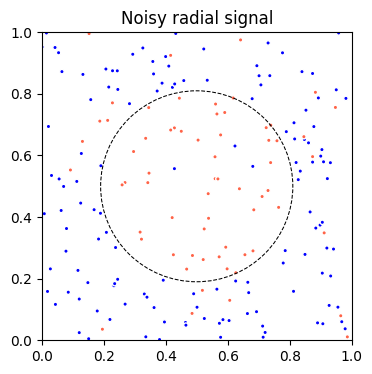

In [127]:
fig, ax = plt.subplots(figsize=(4, 4))

circle = plt.Circle((.5, .5), .31, fc='None', ec='k', ls='dashed', lw=.75)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='white', s=10)
ax.add_patch(circle)

ax.set_title('Noisy radial signal')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1);

## Two Layer ReLU Network

In [128]:
X, y = datasets[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [129]:
class two_layer_ReLU(keras.Model):

  def __init__(self, num_units):

    super().__init__()

    self.net = Sequential([
        Dense(num_units, activation='relu'),
        Dense(num_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

  def call(self, X):
    return self.net(X)

In [130]:
model = two_layer_ReLU(8)

In [131]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
params = {
    'epochs': 300,
    'batch_size': 64,
    'verbose': 0,
    'validation_split': .1
}

In [133]:
history = model.fit(X_train, y_train, **params)

In [134]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.5757 - accuracy: 0.7750
[0.5757135152816772, 0.7749999761581421]
Loss =  0.5757135152816772
Accuracy =  0.7749999761581421


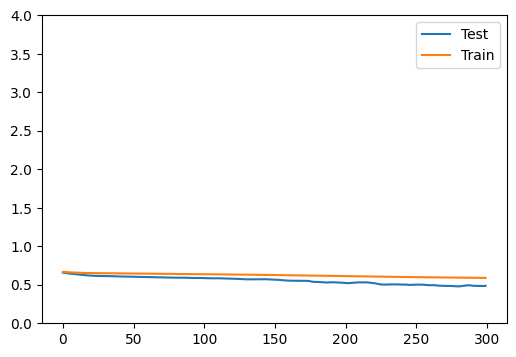

In [135]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(history.history['val_loss'], label='Test')
ax.plot(history.history['loss'], label='Train')


# plt.xscale('log')

ax.legend();

## Model-Wise Double Descent

In [136]:
num_units = 2**np.arange(3, 12)

params = {
    'epochs': 30,
    'batch_size': 64,
    'verbose': 0,
    'validation_split': .1
}

In [137]:
train_loss = []
test_loss = []

for i in num_units:

  model = two_layer_ReLU(i)

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.fit(X_train, y_train, **params)

  loss1 = model.evaluate(X_train, y_train)[0]
  loss2 = model.evaluate(X_test, y_test)[0]

  train_loss.append(loss1)
  test_loss.append(loss2)

2/2 [==============================] - 1s 256ms/step - loss: 0.4461 - accuracy: 0.8500


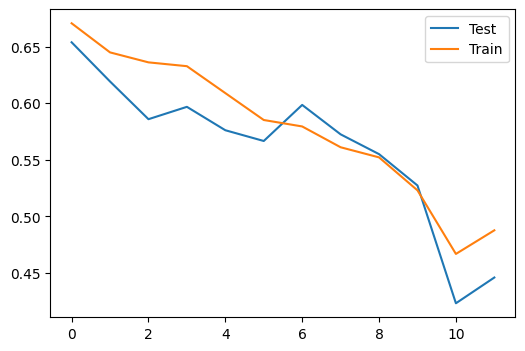

In [138]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(test_loss, label='Test')
ax.plot(train_loss, label='Train')

# plt.xscale('log')

ax.legend();

## Epoch-Wise Double Descent

In [144]:
model = two_layer_ReLU(256)

In [145]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
params = {
    'epochs': 1000,
    'batch_size': 32,
    'verbose': 0,
    'validation_split': .1
}

In [147]:
history = model.fit(X_train, y_train, **params)

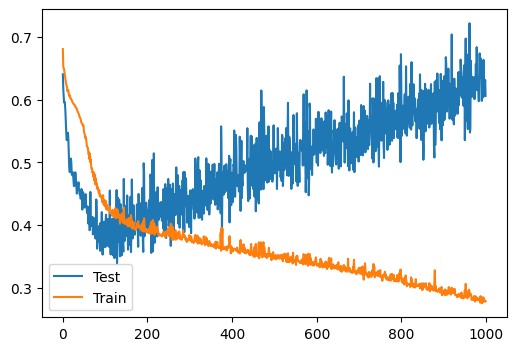

In [148]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(history.history['val_loss'], label='Test')
ax.plot(history.history['loss'], label='Train')

ax.legend();

This is classical bias-variance tradeoff!